In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!wget -q -O 'localidades.json' https://apis.datos.gob.ar/georef/api/localidades?provincia=caba&max=500

print('Data downloaded!')

Data downloaded!


In [3]:
with open('localidades.json') as json_data:
    caba_data = json.load(json_data)

In [4]:
caba_data

{'cantidad': 49,
 'inicio': 0,
 'localidades': [{'categoria': 'Componente de localidad compuesta',
   'centroide': {'lat': -34.6132917290185, 'lon': -58.3887517365082},
   'departamento': {'id': None, 'nombre': None},
   'id': '02000010000',
   'localidad_censal': {'id': '02000010',
    'nombre': 'Ciudad Autónoma de Buenos Aires'},
   'municipio': {'id': None, 'nombre': None},
   'nombre': 'CIUDAD DE BUENOS AIRES',
   'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'}},
  {'categoria': 'Entidad',
   'centroide': {'lat': -34.6250478642294, 'lon': -58.384387226424},
   'departamento': {'id': '02007', 'nombre': 'Comuna 1'},
   'id': '02007010001',
   'localidad_censal': {'id': '02000010',
    'nombre': 'Ciudad Autónoma de Buenos Aires'},
   'municipio': {'id': None, 'nombre': None},
   'nombre': 'CONSTITUCION',
   'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'}},
  {'categoria': 'Entidad',
   'centroide': {'lat': -34.6126880821742, 'lon': -58.379

In [5]:
localidades_data = caba_data['localidades']

In [6]:
localidades_data[1]

{'categoria': 'Entidad',
 'centroide': {'lat': -34.6250478642294, 'lon': -58.384387226424},
 'departamento': {'id': '02007', 'nombre': 'Comuna 1'},
 'id': '02007010001',
 'localidad_censal': {'id': '02000010',
  'nombre': 'Ciudad Autónoma de Buenos Aires'},
 'municipio': {'id': None, 'nombre': None},
 'nombre': 'CONSTITUCION',
 'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'}}

In [7]:
# define the dataframe columns
column_names = ['localidad', 'lat', 'lon'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,localidad,lat,lon


In [9]:
for data in localidades_data:
    neighborhood_name = data['nombre']
        
    neighborhood_lat = data['centroide']['lat']
    neighborhood_lon = data['centroide']['lon']
    
    neighborhoods = neighborhoods.append({
                                          'localidad': neighborhood_name,
                                          'lat': neighborhood_lat,
                                          'lon': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods

,localidad,lat,lon
0,CIUDAD DE BUENOS AIRES,-34.613292,-58.388752
1,CONSTITUCION,-34.625048,-58.384387
2,MONSERRAT,-34.612688,-58.379652
3,PUERTO MADERO,-34.609216,-58.356381
4,RETIRO,-34.588424,-58.375936
5,SAN NICOLAS,-34.603668,-58.380514
6,SAN TELMO,-34.621520,-58.371545
7,RECOLETA,-34.585876,-58.394996
8,BALVANERA,-34.609100,-58.403063
9,SAN CRISTOBAL,-34.623864,-58.401886


In [11]:
address = 'Ciudad de Buenos Aires'

geolocator = Nominatim(user_agent="ba_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ciudad de Buenos Aires are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ciudad de Buenos Aires are -34.6075682, -58.4370894.


In [12]:
# create map of New York using latitude and longitude values
map_ba = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['lat'], neighborhoods['lon'], neighborhoods['localidad']):
    label = '{}, {}'.format(neighborhood, 'CABA')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ba)  
    
map_ba

In [13]:
filename = "PrecioM2.csv"

#filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

precios = pd.read_csv(filename)
precios.head()



,Barrio,USD_M2
0,AGRONOMIA,2290
1,ALMAGRO,3129
2,BALVANERA,2731
3,BARRACAS,2386
4,BELGRANO,3895


In [14]:
ba_merged = neighborhoods
ba_merged = ba_merged.join(precios.set_index('Barrio'), on='localidad')
ba_merged.dropna(subset=["USD_M2"], axis=0, inplace=True)

# reset index, because we droped two rows
ba_merged.reset_index(drop=True, inplace=True)

ba_merged['USD_M2'] = ba_merged['USD_M2'].astype(float)

In [15]:
ba_merged

,localidad,lat,lon,USD_M2
0,CONSTITUCION,-34.625048,-58.384387,1585.0
1,MONSERRAT,-34.612688,-58.379652,2710.0
2,PUERTO MADERO,-34.609216,-58.356381,2477.0
3,RETIRO,-34.588424,-58.375936,3075.0
4,SAN NICOLAS,-34.603668,-58.380514,2958.0
5,SAN TELMO,-34.621520,-58.371545,3061.0
6,RECOLETA,-34.585876,-58.394996,3967.0
7,BALVANERA,-34.609100,-58.403063,2731.0
8,SAN CRISTOBAL,-34.623864,-58.401886,2332.0
9,BARRACAS,-34.646414,-58.384271,2386.0


In [16]:

!wget --quiet http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson -O barrios.json
    
print('GeoJSON file downloaded!')

barrios_geo = r'barrios.json' # geojson file

print(barrios_geo)

GeoJSON file downloaded!
barrios.json


In [17]:
threshold_scale = np.linspace(ba_merged['USD_M2'].min(),
                              ba_merged['USD_M2'].max(),
                              6, dtype=float)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

# let Folium determine the scale.
#map_ba = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
map_ba.choropleth(
    geo_data=barrios_geo,
    data=ba_merged,
    columns=['localidad', 'USD_M2'],
    key_on='feature.properties.barrio',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Prices per Sqr. Meter',
    reset=True
)

for lat, lng, neighborhood in zip(neighborhoods['lat'], neighborhoods['lon'], neighborhoods['localidad']):
    label = '{}, {}'.format(neighborhood, 'CABA')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ba)  
    
map_ba



In [18]:
CLIENT_ID = 'T3ORE0TB1RLRCC2RSVN4D2V1YPE1WIYFJC34DV05W1NJPTKW' # your Foursquare ID
CLIENT_SECRET = 'OAOCBFTMREPZHMG3S21OJWVOCEIPGCQHLE5GLEURWXACIYAP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T3ORE0TB1RLRCC2RSVN4D2V1YPE1WIYFJC34DV05W1NJPTKW
CLIENT_SECRET:OAOCBFTMREPZHMG3S21OJWVOCEIPGCQHLE5GLEURWXACIYAP


In [19]:
neighborhood_latitude = ba_merged.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = ba_merged.loc[0, 'lon'] # neighborhood longitude value

neighborhood_name = ba_merged.loc[0, 'localidad'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of CONSTITUCION are -34.6250478642294, -58.384387226424.


In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
 
radius = 1000 # define radius
 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=T3ORE0TB1RLRCC2RSVN4D2V1YPE1WIYFJC34DV05W1NJPTKW&client_secret=OAOCBFTMREPZHMG3S21OJWVOCEIPGCQHLE5GLEURWXACIYAP&v=20180605&ll=-34.6250478642294,-58.384387226424&radius=1000&limit=100'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef143e714a126001b5c8644'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Constitución',
  'headerFullLocation': 'Constitución, Buenos Aires',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 56,
  'suggestedBounds': {'ne': {'lat': -34.61604785522939,
    'lng': -58.373470547069175},
   'sw': {'lat': -34.63404787322941, 'lng': -58.39530390577883}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c5cc3a385a1e21ef7c45711',
       'name': 'Aramburu',
       'location': {'address': 'Salta 1050',
        'crossStreet': 'e/ Carlos Calvo y Humberto Primo',
        'lat': -34.62042774669655,
        'lng': -58.38293857053526,
        

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Aramburu,Argentinian Restaurant,-34.620428,-58.382939
1,Extrawurst,German Restaurant,-34.628086,-58.389447
2,Untertürkheim,German Restaurant,-34.620885,-58.378614
3,La Flor De San Juan,Food Court,-34.622760,-58.392374
4,CCCP,Russian Restaurant,-34.619685,-58.377002


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

56 venues were returned by Foursquare.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
ba_venues = getNearbyVenues(names=ba_merged['localidad'],
                                   latitudes=ba_merged['lat'],
                                   longitudes=ba_merged['lon']
                                  )

CONSTITUCION
MONSERRAT
PUERTO MADERO
RETIRO
SAN NICOLAS
SAN TELMO
RECOLETA
BALVANERA
SAN CRISTOBAL
BARRACAS
BOCA
NUEVA POMPEYA
PARQUE PATRICIOS
ALMAGRO
BOEDO
CABALLITO
FLORES
PARQUE CHACABUCO
VILLA LUGANO
VILLA RIACHUELO
VILLA SOLDATI
LINIERS
MATADEROS
PARQUE AVELLANEDA
FLORESTA
MONTE CASTRO
VELEZ SARSFIELD
VERSALLES
VILLA LURO
VILLA REAL
VILLA DEL PARQUE
VILLA DEVOTO
VILLA GENERAL MITRE
VILLA SANTA RITA
COGHLAN
SAAVEDRA
VILLA PUEYRREDON
VILLA URQUIZA
BELGRANO
COLEGIALES
NUÑEZ
PALERMO
AGRONOMIA
CHACARITA
PARQUE CHAS
PATERNAL
VILLA CRESPO
VILLA ORTUZAR


In [27]:
print(ba_venues.shape)
ba_venues.head()

(2669, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CONSTITUCION,-34.625048,-58.384387,Aramburu,-34.620428,-58.382939,Argentinian Restaurant
1,CONSTITUCION,-34.625048,-58.384387,Extrawurst,-34.628086,-58.389447,German Restaurant
2,CONSTITUCION,-34.625048,-58.384387,Untertürkheim,-34.620885,-58.378614,German Restaurant
3,CONSTITUCION,-34.625048,-58.384387,La Flor De San Juan,-34.622760,-58.392374,Food Court
4,CONSTITUCION,-34.625048,-58.384387,CCCP,-34.619685,-58.377002,Russian Restaurant


In [28]:
ba_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AGRONOMIA,42,42,42,42,42,42
ALMAGRO,100,100,100,100,100,100
BALVANERA,100,100,100,100,100,100
BARRACAS,14,14,14,14,14,14
BELGRANO,100,100,100,100,100,100
BOCA,31,31,31,31,31,31
BOEDO,54,54,54,54,54,54
CABALLITO,100,100,100,100,100,100
CHACARITA,78,78,78,78,78,78


In [29]:
print('There are {} uniques categories.'.format(len(ba_venues['Venue Category'].unique())))

There are 251 uniques categories.


In [30]:
ba_venues['Venue Category'].unique()

array(['Argentinian Restaurant', 'German Restaurant', 'Food Court',
       'Russian Restaurant', 'Cultural Center', 'Hostel', 'Lounge',
       'Circus', 'Coffee Shop', 'Pizza Place', 'Hotel', 'Beer Bar',
       'Café', 'Pool', 'Soccer Field', 'Ice Cream Shop',
       'Residential Building (Apartment / Condo)', 'Restaurant', 'Bakery',
       'Diner', 'Burger Joint', 'Gym', 'Theme Restaurant', 'Plaza',
       'Performing Arts Venue', 'BBQ Joint', 'Gastropub', 'Pub',
       'Home Service', 'Bookstore', 'Bus Stop', 'Convenience Store',
       'Music Venue', 'Gym / Fitness Center', 'Fast Food Restaurant',
       'Dance Studio', 'Sandwich Place', 'Nightclub', 'Bistro',
       'Camera Store', 'Spanish Restaurant', 'Hobby Shop',
       'Bed & Breakfast', 'Theater', 'Pool Hall', 'Japanese Restaurant',
       'Church', 'Italian Restaurant', 'Cosmetics Shop',
       'Bike Rental / Bike Share', 'Brewery', 'Smoke Shop', 'Jazz Club',
       'Bar', 'Outdoor Sculpture', 'Event Space', 'French Restaura

In [31]:
# one hot encoding
ba_onehot = pd.get_dummies(ba_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ba_onehot['Neighborhood'] = ba_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ba_onehot.columns[-1]] + list(ba_onehot.columns[:-1])
ba_onehot = ba_onehot[fixed_columns]

ba_onehot.head()

,Women's Store,Adult Boutique,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Border Crossing,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Doctor's Office,Dog Run,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Theater,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Leather Goods Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Pool Hall,Port,Print Shop,Pub,Public Art,Racecourse,Racetrack,Radio Station,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Rugby Pitch,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toy / Game Store,Track,Trail,Train Station,Tunnel,Used Bookstore,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CONSTITUCION,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
ba_onehot.shape

(2669, 251)

In [33]:
ba_grouped = ba_onehot.groupby('Neighborhood').mean().reset_index()
ba_grouped

,Neighborhood,Women's Store,Adult Boutique,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Border Crossing,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Doctor's Office,Dog Run,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Theater,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Leather Goods Store,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nature Preserve,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Pool Hall,Port,Print Shop,Pub,Public Art,Racecourse,Racetrack,Radio Station,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Rugby Pitch,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toy / Game Store,Track,Trail,Train Station,Tunnel,Used Bookstore,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop
0,AGRONOMIA,0.000000,0.00,0.000000,0.00,0.00,0.00,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.071429,0.000000,0.071429,0.00000,0.000000,0.00,0.023810,0.023810,0.00,0.000000,0.023810,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.095238,0.000000,0.00,0.000000,0.00,0.00,0.

In [34]:
ba_grouped.shape

(48, 251)

In [35]:
num_top_venues = 10

for hood in ba_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ba_grouped[ba_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AGRONOMIA----
                       venue  freq
0                Pizza Place  0.10
1                Coffee Shop  0.10
2               Burger Joint  0.07
3                   Bus Stop  0.07
4                        Bar  0.07
5               Soccer Field  0.05
6                Sports Club  0.05
7         Athletics & Sports  0.05
8  Cajun / Creole Restaurant  0.02
9                 Steakhouse  0.02


----ALMAGRO----
                    venue  freq
0  Argentinian Restaurant  0.12
1                     Bar  0.08
2          Ice Cream Shop  0.07
3                     Gym  0.05
4                    Café  0.05
5             Pizza Place  0.04
6             Coffee Shop  0.03
7      Italian Restaurant  0.03
8                   Hotel  0.03
9           Indie Theater  0.03


----BALVANERA----
                  venue  freq
0                  Café  0.09
1                   Gym  0.06
2               Theater  0.04
3  Fast Food Restaurant  0.04
4   Japanese Restaurant  0.04
5     Electronics Store  0.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ba_grouped['Neighborhood']

for ind in np.arange(ba_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ba_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AGRONOMIA,Coffee Shop,Pizza Place,Burger Joint,Bus Stop,Bar,Athletics & Sports,Soccer Field,Sports Club,Restaurant,Steakhouse
1,ALMAGRO,Argentinian Restaurant,Bar,Ice Cream Shop,Café,Gym,Pizza Place,Coffee Shop,Restaurant,Italian Restaurant,Hotel
2,BALVANERA,Café,Gym,Japanese Restaurant,Coffee Shop,Electronics Store,Theater,Fast Food Restaurant,Ice Cream Shop,Peruvian Restaurant,Hotel
3,BARRACAS,Argentinian Restaurant,Auto Workshop,Flower Shop,Athletics & Sports,Park,Soccer Field,Plaza,Gym,Clothing Store,Electronics Store
4,BELGRANO,Café,Pizza Place,BBQ Joint,Italian Restaurant,Ice Cream Shop,Argentinian Restaurant,Coffee Shop,Peruvian Restaurant,Grocery Store,French Restaurant


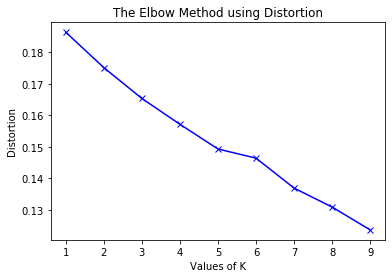

In [38]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

ba_grouped_clustering = ba_grouped.drop('Neighborhood', 1)
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(ba_grouped_clustering) 
    kmeanModel.fit(ba_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(ba_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / ba_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(ba_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / ba_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
  


plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 




In [39]:
# set number of clusters
kclusters = 6

ba_grouped_clustering = ba_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ba_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int32)

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ba_merged_venue = ba_merged

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ba_merged_venue = ba_merged_venue.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='localidad')

ba_merged_venue.head() # check the last columns!

,localidad,lat,lon,USD_M2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CONSTITUCION,-34.625048,-58.384387,1585.0,2,Hotel,Argentinian Restaurant,Café,Pizza Place,Coffee Shop,German Restaurant,Bakery,Restaurant,Soccer Field,Plaza
1,MONSERRAT,-34.612688,-58.379652,2710.0,2,Hotel,Argentinian Restaurant,Café,Hostel,Coffee Shop,Spanish Restaurant,Bar,Brewery,Burger Joint,Nightclub
2,PUERTO MADERO,-34.609216,-58.356381,2477.0,2,Argentinian Restaurant,Coffee Shop,Hotel Bar,Outdoor Sculpture,Food Truck,Park,Hotel,BBQ Joint,Japanese Restaurant,Café
3,RETIRO,-34.588424,-58.375936,3075.0,2,Hotel,Coffee Shop,Argentinian Restaurant,Restaurant,Café,Italian Restaurant,Deli / Bodega,Ice Cream Shop,Sandwich Place,Cocktail Bar
4,SAN NICOLAS,-34.603668,-58.380514,2958.0,2,Coffee Shop,Theater,Hotel,Café,Sandwich Place,Restaurant,Argentinian Restaurant,Pizza Place,Nightclub,Ice Cream Shop


In [41]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

threshold_scale = np.linspace(ba_merged['USD_M2'].min(),
                              ba_merged['USD_M2'].max(),
                              6, dtype=float)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

# let Folium determine the scale.
#map_ba = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
map_clusters.choropleth(
    geo_data=barrios_geo,
    data=ba_merged,
    columns=['localidad', 'USD_M2'],
    key_on='feature.properties.barrio',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Prices per Sqr. Meter',
    reset=True
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ba_merged_venue['lat'], ba_merged_venue['lon'], ba_merged_venue['localidad'], ba_merged_venue['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
ba_merged_venue.loc[ba_merged_venue['Cluster Labels'] == 0, ba_merged_venue.columns[[0] + list(range(5, ba_merged_venue.shape[1]))]]

,localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,PARQUE AVELLANEDA,Convenience Store,Park,Athletics & Sports,History Museum,Food & Drink Shop,Shopping Mall,Toll Booth,Gym,Pool,Diner


In [43]:
ba_merged_venue.loc[ba_merged_venue['Cluster Labels'] == 1, ba_merged_venue.columns[[0] + list(range(5, ba_merged_venue.shape[1]))]]

,localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,NUEVA POMPEYA,Pizza Place,Grocery Store,Food Truck,Nightclub,Department Store,Thrift / Vintage Store,Sports Club,Fast Food Restaurant,Seafood Restaurant,Train Station
18,VILLA LUGANO,Bus Stop,Ice Cream Shop,Pizza Place,Sports Club,Gym,Argentinian Restaurant,Pharmacy,Dessert Shop,Bakery,Food Court
22,MATADEROS,Pizza Place,Dessert Shop,Café,Paper / Office Supplies Store,Wine Shop,Grocery Store,Soccer Field,Bus Stop,Sports Club,Office
25,MONTE CASTRO,Pizza Place,Bus Stop,Café,Plaza,Ice Cream Shop,Gym / Fitness Center,Sushi Restaurant,Bakery,Argentinian Restaurant,Diner


In [44]:
ba_merged_venue.loc[ba_merged_venue['Cluster Labels'] == 2, ba_merged_venue.columns[[0] + list(range(5, ba_merged_venue.shape[1]))]]

,localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CONSTITUCION,Hotel,Argentinian Restaurant,Café,Pizza Place,Coffee Shop,German Restaurant,Bakery,Restaurant,Soccer Field,Plaza
1,MONSERRAT,Hotel,Argentinian Restaurant,Café,Hostel,Coffee Shop,Spanish Restaurant,Bar,Brewery,Burger Joint,Nightclub
2,PUERTO MADERO,Argentinian Restaurant,Coffee Shop,Hotel Bar,Outdoor Sculpture,Food Truck,Park,Hotel,BBQ Joint,Japanese Restaurant,Café
3,RETIRO,Hotel,Coffee Shop,Argentinian Restaurant,Restaurant,Café,Italian Restaurant,Deli / Bodega,Ice Cream Shop,Sandwich Place,Cocktail Bar
4,SAN NICOLAS,Coffee Shop,Theater,Hotel,Café,Sandwich Place,Restaurant,Argentinian Restaurant,Pizza Place,Nightclub,Ice Cream Shop
5,SAN TELMO,Argentinian Restaurant,Bar,Hostel,BBQ Joint,Hotel,Italian Restaurant,Coffee Shop,Café,Ice Cream Shop,Gastropub
6,RECOLETA,Hotel,Plaza,Italian Restaurant,Coffee Shop,Argentinian Restaurant,Ice Cream Shop,Bakery,Tea Room,Café,Chocolate Shop
7,BALVANERA,Café,Gym,Japanese Restaurant,Coffee Shop,Electronics Store,Theater,Fast Food Restaurant,Ice Cream Shop,Peruvian Restaurant,Hotel
8,SAN CRISTOBAL,Pizza Place,Ice Cream Shop,Grocery Store,Supermarket,Pharmacy,Bakery,Argentinian Restaurant,Theater,Convenience Store,Furniture / Home Store
10,BOCA,Argentinian Restaurant,BBQ Joint,Bus Stop,Pizza Place,Seafood Restaurant,Art Gallery,Snack Place,Casino,Bistro,Farmers Market


In [45]:
ba_merged_venue.loc[ba_merged_venue['Cluster Labels'] == 3, ba_merged_venue.columns[[0] + list(range(5, ba_merged_venue.shape[1]))]]

,localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,VILLA RIACHUELO,Racetrack,Furniture / Home Store,Go Kart Track,Park,Supermarket,Wine Shop,Fish Market,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [46]:
ba_merged_venue.loc[ba_merged_venue['Cluster Labels'] == 4, ba_merged_venue.columns[[0] + list(range(5, ba_merged_venue.shape[1]))]]

,localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,BARRACAS,Argentinian Restaurant,Auto Workshop,Flower Shop,Athletics & Sports,Park,Soccer Field,Plaza,Gym,Clothing Store,Electronics Store


In [47]:
ba_merged_venue.loc[ba_merged_venue['Cluster Labels'] == 5, ba_merged_venue.columns[[0] + list(range(5, ba_merged_venue.shape[1]))]]

,localidad,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,VILLA SOLDATI,Light Rail Station,Moving Target,Soccer Stadium,Soccer Field,Recreation Center,Wine Shop,Flea Market,Farmers Market,Fast Food Restaurant,Fish Market
